In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [98]:
df=pd.read_csv(r'..\churn_data\NewData_chank.csv')

#Set the Row,Col and width of data sets
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

### Data Preparation

In [99]:
# Creating X (features) and Y (Target) variable
X = df.drop(columns=['target'])
X.head(20)


,s4.usg.ins.p2,s2.rch.val.p6,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s8.og.rev.p3,s8.ic.mou.all.p3,s7.rtd.mou.p2.p6,s1.og.rev.all.p2,s4.rch.val.gt.30.p2,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.data.ins.l14,s4.dec.ins.p2,s3.og.rev.all.m2,s3.new.rev.m2
0,4,39.29,-0.72,1.000000,-0.60,-0.73,0.06,16.31800,0,0,6,0,4,6.020,8.20
1,1,21.67,-0.08,0.500000,-0.14,0.00,0.01,0.75620,0,0,7,0,1,3.660,8.10
2,2,30.00,-0.09,0.384615,-0.45,-1.03,0.00,0.51740,0,1,7,0,2,4.330,4.36
3,2,50.00,1.83,0.416667,-0.02,-0.43,0.02,1.27360,0,2,3,0,2,3.400,3.53
4,3,22.50,-0.04,0.222222,-0.67,-1.04,0.00,0.29850,0,1,0,2,3,3.850,3.87
5,7,150.00,6.59,99.000000,0.61,-0.99,0.24,127.64496,2,9,0,12,0,14.831,23.55
6,4,44.83,2.91,0.187500,0.61,-0.42,0.30,59.73980,1,1,5,0,4,5.560,6.75
7,7,99.40,6.59,0.000000,0.29,0.03,0.16,61.89990,2,9,0,0,7,4.980,5.60
8,0,69.09,0.00,0.700000,-1.18,-1.12,0.00,0.00000,0,6,7,1,0,14.831,23.55
9,7,51.20,-4.16,0.000000,-0.08,0.10,0.21,24.82320,0,1,0,0,7,4.900,7.22


In [100]:
y = df['target']
y.head(20)

#df['target'].value_counts()

0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: target, dtype: int64

In [101]:
# Split the dataset into training and testing  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
X_train.head()

,s4.usg.ins.p2,s2.rch.val.p6,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s8.og.rev.p3,s8.ic.mou.all.p3,s7.rtd.mou.p2.p6,s1.og.rev.all.p2,s4.rch.val.gt.30.p2,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.data.ins.l14,s4.dec.ins.p2,s3.og.rev.all.m2,s3.new.rev.m2
23311,5,150.00,0.00,0.333333,0.00,-0.07,0.10,0.0000,1,1,7,10,0,2.40,23.55
23623,7,103.33,6.59,0.000000,0.61,0.42,0.25,73.0728,1,0,1,0,7,6.72,6.78
1020,7,16.80,0.43,0.000000,0.12,0.38,0.22,17.6314,0,2,4,6,2,2.40,5.42
12645,1,25.60,-1.48,0.315789,0.00,-0.42,0.01,0.3184,0,0,3,8,0,2.40,3.42
1533,7,135.57,-10.84,0.000000,0.61,0.19,0.30,107.6631,0,7,1,12,0,7.76,8.10


In [114]:
## Prepruning Technique
parameter ={
    'criterion':['gini','entropy'],
    'splitter' :['best','random'],
    'max_depth' :[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [115]:
d_treemodel = DecisionTreeClassifier() 
cv=GridSearchCV(d_treemodel,param_grid=parameter, cv=5, scoring='accuracy')

In [116]:
cv.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [125]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

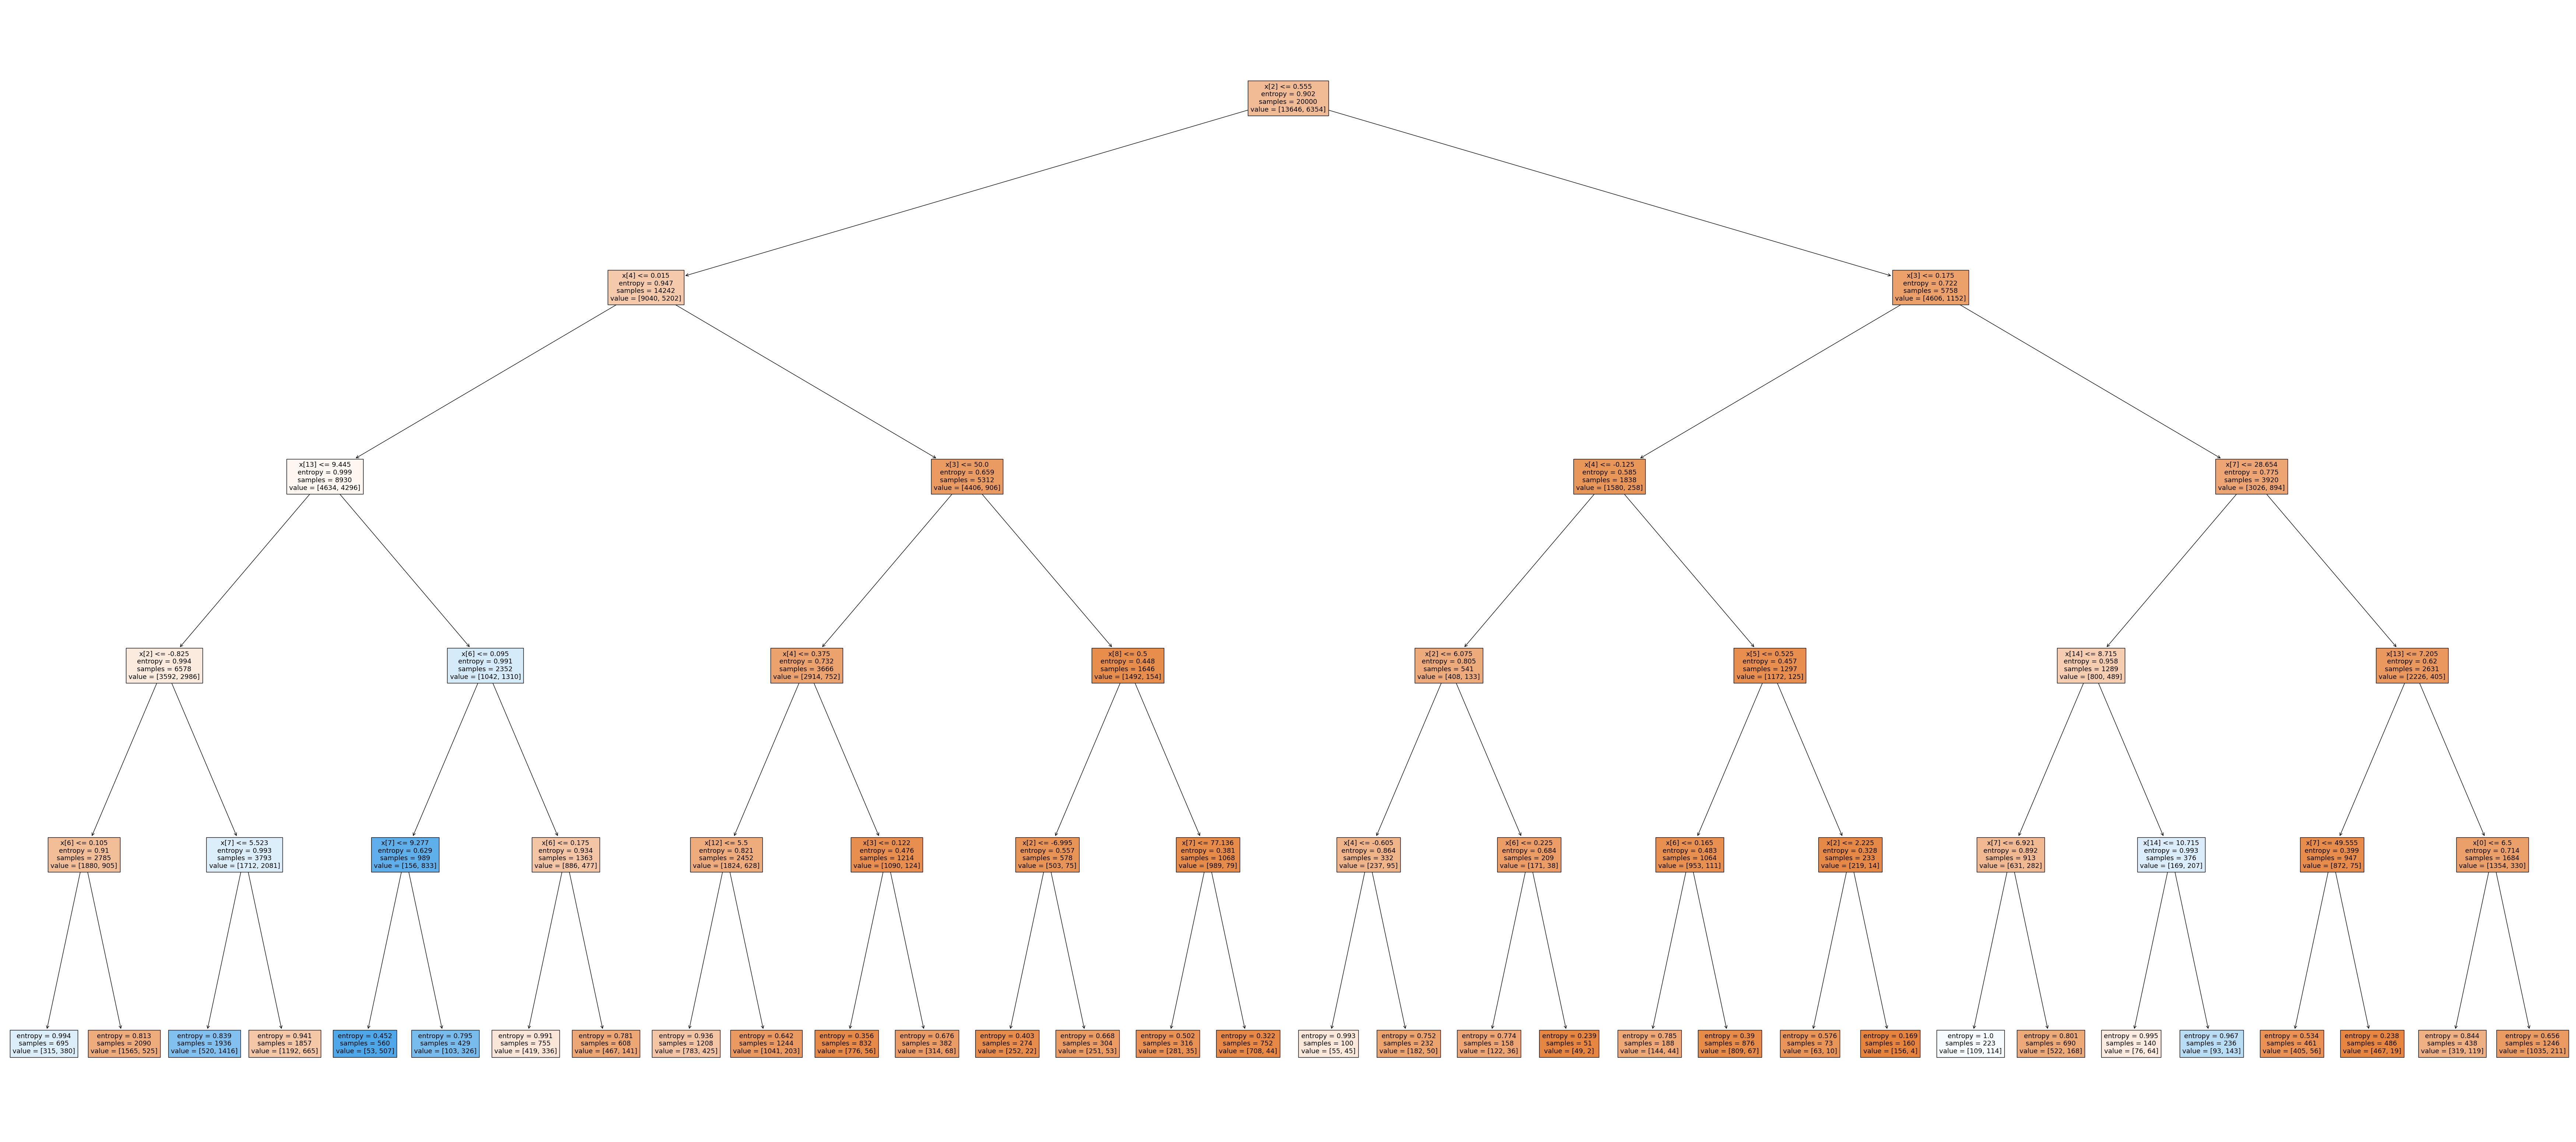

In [128]:
best_params = cv.best_params_

# Create a decision tree classifier with the best parameters
best_d_tree_model = DecisionTreeClassifier(**best_params)

# Fit the decision tree model with the best parameters
best_d_tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(90, 40))
plot_tree(best_d_tree_model, filled=True)
plt.show()

In [119]:
y_pred=cv.predict(X_test)

In [120]:
score = accuracy_score(y_pred,y_test)

In [122]:
score

0.7696

In [123]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      3897
           1       0.48      0.69      0.57      1103

    accuracy                           0.77      5000
   macro avg       0.69      0.74      0.71      5000
weighted avg       0.81      0.77      0.78      5000

